# Biodata
* Nama: **Virgiawan Teguh Kusuma**
* Email: **181240000833@unisnu.ac.id**
* Domisili: **Kabupaten Jepara, Jawa Tengah**

# Domain Proyek
Menurut data dari jurnal yang berjudul [Kepopuleran dan Penerimaan Anime Jepang Di Indonesia](https://ejournal.unitomo.ac.id/index.php/ayumi/article/view/2808), Indonesia menyumbang 2 kota besar sebagai penggemar anime. Kota tersebut adalah **Surabaya** dan **Jakarta**. Dua kota besar di Indonesia menduduki posisi 13 setelah kota Riyadh, Arab Saudi di peringkat 12.

Pada saat penggemar anime mencari anime lain untuk ditonton, mereka cenderung tidak tahu anime yang sesuai dengan preferensi atau genre mereka.

Sistem rekomendasi Anime merupakan salah satu cara untuk mengetahui preferensi penggemar anime lain dengan menunjukkan Anime yang potensial baginya. Rekomendasi ini juga membantu penonton anime mendapatkan anime yang sesuai preferensi pengguna lain sesuai dengan rating yang diberikan.
[Collaborative recommendation system in users of anime films](https://iopscience.iop.org/article/10.1088/1742-6596/1566/1/012057/meta)

# Business Understanding
Kebanyakan penggemar anime ketika mencari anime untuk ditonton, mereka kesulitan mencari anime lain yang sesuai dengan preferensi atau genre mereka. Terdapat masalah yang perlu diselesaikan dengan sistem rekomendasi yang akan saya buat.


## Problem Statements
Permasalahannya adalah penggemar anime sering tidak tahu anime lain yang sesuai dengan preferensi dan genre pada sebuah anime yang mereka inginkan.

## Goals
Tujuan dari proyek ini adalah membuat pendekatan sistem rekomendasi dengan machine learning untuk memberikan rekomendasi Anime kepada penonton berdasarkan data anime, user rating.

## Solution statements
Solusi dalam menyelesaikan masalah ini adalah saya menggunakan 2 algoritma: 
* **Content Based Filtering**, adalah algoritma sistem rekomendasi yang bekerja dengan cara merekomendasikan item yang mirip dengan item yang disukai pengguna tersebut	 di masa lalu. Pada proyek ini saya merekomendasikan jenis anime lain yang sesuai preferensi anime pengguna tersebut. Kemiripan itu berdasarkan genre pada anime tersebut.
* **Collaborative Filtering**, adalah algoritma sistem rekomendasi yang bergantung pada pendapat/feedback pengguna, sistem ini berdasarkan kesamaan antar pengguna. Pada proyek ini saya merekomendasikan jenis anime yang pernah dirating oleh pengguna tersebut. Kemiripan itu berdasarkan genre pada anime tersebut.

# Data Understanding
Dataset yang digunakan adalah berisi informasi tentang data preferensi user dari 73.516 user pada 12.294 anime. 
Dataset tersebut diambil dari [Kaggle Anime Recommendations Database](https://www.kaggle.com/CooperUnion/anime-recommendations-database). 
Dataset berisi 2 file csv (**Anime.csv**) dan (**Rating.csv**). Variabel-variabel pada Kaggle Anime Recommendations Database dataset adalah sebagai berikut: 

**Anime.csv**: 
* anime_id: ID unik untuk mengidentifikasi anime.
* name: Nama lengkap anime.
* genre: Daftar genre yang dipisahkan koma untuk anime.
* type: Tipe anime seperti *movie, TV, OVA, dan lain-lain*.
* episodes: Jumlah episode pada anime, jika type nya movie maka hanya 1 episode.
* rating: Rating atau penilaian anime dari 1 hingga 10.
* members: Jumlah anggota komunitas yang ada di anime ini.

**Rating.csv:**
* user_id: ID pengguna yang dibuat secara acak tidak dapat diidentifikasi.
* anime_id: ID anime yang telah diberi peringkat oleh pengguna.
* rating: Rating atau penilaian dari -1 hingga 10 (-1 jika pengguna menontonnya tetapi tidak memberikan rating).

# Load Library

## Load Google Drives

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load Library Lainnya

In [2]:
# Import library
import pandas as pd
import numpy as np 
import zipfile
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import LabelEncoder

!pip install surprise
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

     |████████████████████████████████| 11.8 MB 4.2 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1619418 sha256=8f17f2c91fb70dbdf39498b16a237f82412a404adaf73e6d63574f2503ac66cf
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


# Load Dataset

## Load dataset & Ekstraksi file yang masih berbentuk zip dari GDrive

In [3]:
anime = '/content/drive/MyDrive/Anime Recommendations Database.zip'
animeRef = zipfile.ZipFile(anime, 'r')
animeRef.extractall('/content')
animeRef.close()

## Anime

In [4]:
anime_df = pd.read_csv('anime.csv')
anime_df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


## User

In [5]:
rating_df = pd.read_csv('rating.csv')

# Data Preparation

## Anime

### Melihat data

In [6]:
anime_df

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


### Cek tipe data

In [7]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


### Describe data

In [8]:
anime_df.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


### Cek missing value

In [9]:
anime_df.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

### Handle missing value

In [10]:
anime_df = anime_df.dropna(axis=0)
anime_df.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

### Konversi Tipe Data
Mengubah tipe data pada kolom **rating** menjadi *integer*.

In [11]:
anime_df['rating'] = anime_df['rating'].astype(int)
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12017 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   anime_id  12017 non-null  int64 
 1   name      12017 non-null  object
 2   genre     12017 non-null  object
 3   type      12017 non-null  object
 4   episodes  12017 non-null  object
 5   rating    12017 non-null  int64 
 6   members   12017 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 751.1+ KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
print('Jumlah ID Anime:', len(anime_df['anime_id'].unique()))
print('Jumlah Genre:', len(anime_df['genre'].unique()))
print('Jumlah Nama Anime:', len(anime_df['name'].unique()))
print('Jumlah Rating:', len(anime_df['rating'].unique()))

Jumlah ID Anime: 12017
Jumlah Genre: 3229
Jumlah Nama Anime: 12015
Jumlah Rating: 10


### Cek jumlah rating yang < 1

In [13]:
print('Jumlah total rating < 1 :', anime_df['rating'].lt(1).sum())
anime_df.shape

Jumlah total rating < 1 : 0


(12017, 7)

## User

### Melihat data

In [14]:
rating_df

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


### Cek tipe data

In [15]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


### Describe data

In [16]:
rating_df.describe()

,user_id,anime_id,rating
count,7.813737e+06,7.813737e+06,7.813737e+06
mean,3.672796e+04,8.909072e+03,6.144030e+00
std,2.099795e+04,8.883950e+03,3.727800e+00
min,1.000000e+00,1.000000e+00,-1.000000e+00
25%,1.897400e+04,1.240000e+03,6.000000e+00
50%,3.679100e+04,6.213000e+03,7.000000e+00
75%,5.475700e+04,1.409300e+04,9.000000e+00
max,7.351600e+04,3.451900e+04,1.000000e+01


In [17]:
print('Jumlah user:', len(rating_df['user_id'].unique()))
print('Jumlah anime:', len(rating_df['anime_id'].unique()))
print('Jumlah rating:', len(rating_df['rating'].unique()))

Jumlah user: 73515
Jumlah anime: 11200
Jumlah rating: 11


### Cek jumlah rating yang < 1

In [18]:
print('Jumlah rating < 1 :', rating_df['rating'].lt(1).sum())
rating_df.shape

Jumlah rating < 1 : 1476496


(7813737, 3)

### Menghilangkan rating yang < 1

In [19]:
rating_df = rating_df[rating_df['rating']>=1]
print('Jumlah total rating < 1 :', rating_df['rating'].lt(1).sum())
rating_df.shape

Jumlah total rating < 1 : 0


(6337241, 3)

# Data Visualization

## Anime (rating)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


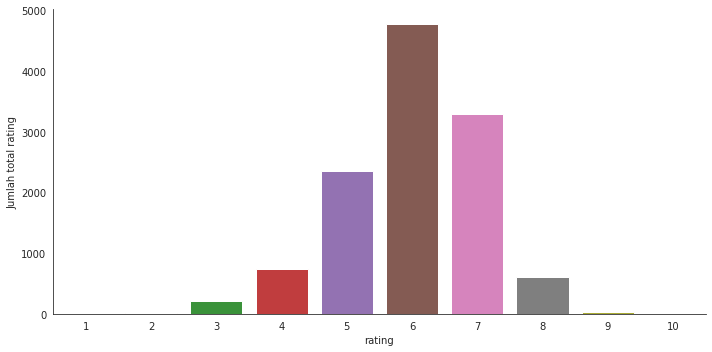

In [20]:
with sns.axes_style('white'):
    g = sns.catplot('rating', data=anime_df, aspect=2.0, kind='count')
    g.set_ylabels('Jumlah total rating')

## Users (rating)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


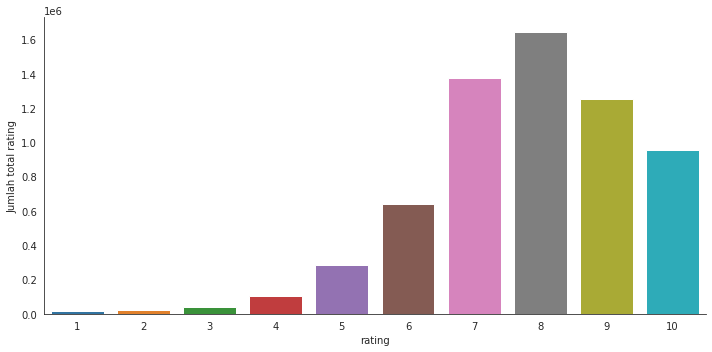

In [21]:
with sns.axes_style('white'):
    g = sns.catplot("rating", data=rating_df, aspect=2.0, kind='count')
    g.set_ylabels("Jumlah total rating")

# Model Development
Model machine learning yang digunakan untuk menyelesaikan permasalahan ini ada 2, yaitu:
* **Content Based Filtering**
* **Collaborative Filtering**

## Content-Based Filtering

In [22]:
anime_df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9,151266


### TF-IDF vectorizer

In [23]:
# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()
 
# Melakukan perhitungan idf pada data cuisine
tf.fit(anime_df['genre']) 
 
# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names() 

['action',
 'adventure',
 'ai',
 'arts',
 'cars',
 'comedy',
 'dementia',
 'demons',
 'drama',
 'ecchi',
 'fantasy',
 'fi',
 'game',
 'harem',
 'hentai',
 'historical',
 'horror',
 'josei',
 'kids',
 'life',
 'magic',
 'martial',
 'mecha',
 'military',
 'music',
 'mystery',
 'of',
 'parody',
 'police',
 'power',
 'psychological',
 'romance',
 'samurai',
 'school',
 'sci',
 'seinen',
 'shoujo',
 'shounen',
 'slice',
 'space',
 'sports',
 'super',
 'supernatural',
 'thriller',
 'vampire',
 'yaoi',
 'yuri']

### Melakukan fit & transformasi ke bentuk matrix

In [24]:
tfidf_matrix = tf.fit_transform(anime_df['genre']) 
tfidf_matrix.shape 

(12017, 47)

### Menghitung cosine similarity pada matrix

In [25]:
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.14715318, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.14715318, 1.        , 0.17877808, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.17877808, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ]])

### Membuat dataframe dari variabel cosine_sim

In [26]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=anime_df['name'],
                             columns=anime_df['name'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix tiap anime
cosine_sim_df.sample(10, axis=1).sample(10, axis=0)

Shape: (12017, 12017)


name,Great Mazinger tai Getter Robo,Nanami-chan,Ozmafia!!,Senbon Matsubara,Boku no Boukuugou,Marvel Disk Wars: The Avengers,Robotica*Robotics,Ippou Nippon Mukashibanashi,Osaru no Kantai,Gegege no Kitarou: Chisougan
name,,,,,,,,,,
Mobile Suit Gundam,0.683751,0.000000,0.000000,0.000000,0.000000,0.098968,0.169447,0.000000,0.39094,0.000000
Kaguya-hime: Taketori Monogatari,0.000000,0.000000,0.334278,0.591342,0.496113,0.000000,0.000000,0.000000,0.00000,0.000000
Ryuusei Sentai Musumet,0.366750,0.149334,0.164993,0.000000,0.000000,0.000000,0.201584,0.161848,0.00000,0.212955
Gugure! Kokkuri-san,0.000000,0.216397,0.000000,0.000000,0.000000,0.000000,0.162734,0.234532,0.00000,0.454544
Nippon Tanjou,0.000000,0.000000,0.450989,0.797805,0.669328,0.000000,0.000000,0.000000,0.00000,0.000000
Pokemon Best Wishes! Season 2: Decolora Adventure,0.180772,0.624618,0.151260,0.000000,0.284801,0.366044,0.000000,0.576321,0.00000,0.440673
Zouressha ga Yatte Kita,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.372623
Mai no Mahou to Katei no Hi,0.000000,0.000000,0.000000,0.359428,0.301546,0.000000,0.000000,0.000000,0.00000,0.000000
Nazotoki-hime wa Meitantei♥,0.000000,0.000000,0.325757,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000


### Membuat function

In [27]:
def animeRecommendations(anime_name, similarity_data=cosine_sim_df, 
                         items=anime_df[['name','genre','type','rating' ]], k=10):
  
    ''' Mengambil data menggunakan argpartition untuk partisi secara tidak langsung,
    sepanjang sumbu yang diberikan, kemudian dataframe diubah menjadi numpy Range 
    dengan parameter sebagai berikut (start, stop, step) '''
    index = similarity_data.loc[:, anime_name].to_numpy().argpartition(
        range(-1, -k, -1)
    )

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop anime_name agar nama anime yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(anime_name, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

### Memprediksi Anime

In [28]:
anime_name = 'Boruto: Naruto the Movie'
anime_recommend = animeRecommendations(anime_name)
anime_recommend

,name,genre,type,rating
0,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,7
1,Naruto x UT,"Action, Comedy, Martial Arts, Shounen, Super P...",OVA,7
2,Boruto: Naruto the Movie - Naruto ga Hokage ni...,"Action, Comedy, Martial Arts, Shounen, Super P...",Special,7
3,Naruto: Shippuuden Movie 4 - The Lost Tower,"Action, Comedy, Martial Arts, Shounen, Super P...",Movie,7
4,Naruto Shippuuden: Sunny Side Battle,"Action, Comedy, Martial Arts, Shounen, Super P...",Special,7
5,Naruto: Shippuuden,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,7
6,Naruto Soyokazeden Movie: Naruto to Mashin to ...,"Action, Comedy, Martial Arts, Shounen, Super P...",Movie,7
7,Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsu...,"Action, Comedy, Martial Arts, Shounen, Super P...",Movie,7
8,Kyutai Panic Adventure!,"Action, Martial Arts, Shounen, Super Power",Special,5
9,Naruto: Shippuuden Movie 6 - Road to Ninja,"Action, Adventure, Martial Arts, Shounen, Supe...",Movie,7


## Collaborative Filtering

### Melihat data

In [29]:
anime_df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9,151266


In [30]:
rating_df.head()

,user_id,anime_id,rating
47,1,8074,10
81,1,11617,10
83,1,11757,10
101,1,15451,10
153,2,11771,10


### Merge dataframe rating dan anime list

In [31]:
anime_rating = pd.merge(rating_df, anime_df, on=['anime_id'],)
anime_rating

,user_id,anime_id,rating_x,name,genre,type,episodes,rating_y,members
0,1,8074,10,Highschool of the Dead,"Action, Ecchi, Horror, Supernatural",TV,12,7,535892
1,3,8074,6,Highschool of the Dead,"Action, Ecchi, Horror, Supernatural",TV,12,7,535892
2,5,8074,2,Highschool of the Dead,"Action, Ecchi, Horror, Supernatural",TV,12,7,535892
3,12,8074,6,Highschool of the Dead,"Action, Ecchi, Horror, Supernatural",TV,12,7,535892
4,14,8074,6,Highschool of the Dead,"Action, Ecchi, Horror, Supernatural",TV,12,7,535892
...,...,...,...,...,...,...,...,...,...
6337141,69964,23585,7,Haha wo Tazunete Sanzenri Specials,"Adventure, Drama, Slice of Life",Special,2,6,138
6337142,69964,33659,6,Fushigi na Somera-chan Special,"Comedy, Magic, Slice of Life",Special,1,5,444
6337143,72800,30738,4,Gamba: Gamba to Nakama-tachi,"Adventure, Kids",Movie,1,5,185
6337144,73135,8723,5,Anime Rakugo Kan,Comedy,OVA,4,5,264


### Drop dan rename column
* Drop kolom **rating_y** agar tidak terjadi redudansi akibat proses merging.
* Rename kolom **rating_x** menjadi **rating** agar kolom mudah diidentifikasi bahwa itu adalah kolom rating.

In [32]:
anime_rating = anime_rating.drop(columns='rating_y')
anime_rating = anime_rating.rename(columns={'rating_x':'rating'})

### Cek missing value

In [33]:
anime_rating.isnull().sum()

user_id     0
anime_id    0
rating      0
name        0
genre       0
type        0
episodes    0
members     0
dtype: int64

In [34]:
anime_rating

,user_id,anime_id,rating,name,genre,type,episodes,members
0,1,8074,10,Highschool of the Dead,"Action, Ecchi, Horror, Supernatural",TV,12,535892
1,3,8074,6,Highschool of the Dead,"Action, Ecchi, Horror, Supernatural",TV,12,535892
2,5,8074,2,Highschool of the Dead,"Action, Ecchi, Horror, Supernatural",TV,12,535892
3,12,8074,6,Highschool of the Dead,"Action, Ecchi, Horror, Supernatural",TV,12,535892
4,14,8074,6,Highschool of the Dead,"Action, Ecchi, Horror, Supernatural",TV,12,535892
...,...,...,...,...,...,...,...,...
6337141,69964,23585,7,Haha wo Tazunete Sanzenri Specials,"Adventure, Drama, Slice of Life",Special,2,138
6337142,69964,33659,6,Fushigi na Somera-chan Special,"Comedy, Magic, Slice of Life",Special,1,444
6337143,72800,30738,4,Gamba: Gamba to Nakama-tachi,"Adventure, Kids",Movie,1,185
6337144,73135,8723,5,Anime Rakugo Kan,Comedy,OVA,4,264


### Encoding pada id user



In [35]:
# Mengubah user_id menjadi list
user_id = anime_rating['user_id'].unique().tolist()
print('list user_id: ', user_id)
 
# Encoding user_id
user_to_user_encoded = {x: i for i, x in enumerate(user_id)}
print('encoded user_id : ', user_to_user_encoded)
 
# Encoding angka ke ke user_id
user_encoded_to_user = {i: x for i, x in enumerate(user_id)}

print('encoded angka ke user_id: ', user_encoded_to_user)

Output hidden; open in https://colab.research.google.com to view.

### Encoding pada id anime

In [36]:
# Mengubah anime_id menjadi list
anime_id = anime_rating['anime_id'].unique().tolist()
 
# Encoding anime_id
anime_to_anime_encoded = {x: i for i, x in enumerate(anime_id)}
 
# Encoding angka ke anime_id
anime_encoded_to_anime = {i: x for i, x in enumerate(anime_id)}

print('encoded angka ke anime_id: ', anime_encoded_to_anime)

encoded angka ke anime_id:  {0: 8074, 1: 11617, 2: 11757, 3: 15451, 4: 11771, 5: 20, 6: 154, 7: 170, 8: 199, 9: 225, 10: 341, 11: 430, 12: 527, 13: 552, 14: 813, 15: 1119, 16: 1121, 17: 1122, 18: 1132, 19: 1292, 20: 1313, 21: 1526, 22: 1535, 23: 1564, 24: 1689, 25: 1764, 26: 1943, 27: 2201, 28: 2404, 29: 2847, 30: 3588, 31: 4026, 32: 5114, 33: 5231, 34: 6178, 35: 6702, 36: 6880, 37: 7695, 38: 9107, 39: 9135, 40: 9760, 41: 9917, 42: 9919, 43: 9989, 44: 10408, 45: 10507, 46: 11111, 47: 11703, 48: 11737, 49: 11759, 50: 12671, 51: 14075, 52: 14093, 53: 14345, 54: 14513, 55: 16498, 56: 16512, 57: 16782, 58: 16894, 59: 16918, 60: 17265, 61: 18097, 62: 18115, 63: 18393, 64: 19315, 65: 19815, 66: 20021, 67: 20159, 68: 20507, 69: 20583, 70: 21507, 71: 21881, 72: 22199, 73: 22297, 74: 22319, 75: 22547, 76: 22729, 77: 23301, 78: 23321, 79: 23333, 80: 23755, 81: 24415, 82: 26243, 83: 27631, 84: 27899, 85: 28121, 86: 28171, 87: 28223, 88: 28497, 89: 28701, 90: 28891, 91: 29854, 92: 31043, 93: 31859

### Mapping

In [37]:
# Mapping user_id ke dataframe user
anime_rating['user'] = anime_rating['user_id'].map(user_to_user_encoded)
 
# Mapping anime_id ke dataframe anime
anime_rating['anime'] = anime_rating['anime_id'].map(anime_to_anime_encoded)

### Cek jumlah user, anime, dan mengubah nilai rating menjadi float.

In [38]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
 
# Mendapatkan jumlah anime
num_anime = len(anime_encoded_to_anime)
 
# Mengubah rating menjadi nilai float
anime_rating['rating'] = anime_rating['rating'].values.astype(np.float32)
 
# Nilai minimum rating
min_rating = min(anime_rating['rating'])
 
# Nilai maksimal rating
max_rating = max(anime_rating['rating'])
 
print('Jumlah User: {}, Jumlah anime: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_anime, min_rating, max_rating
))

Jumlah User: 69600, Jumlah anime: 9892, Min Rating: 1.0, Max Rating: 10.0


### Split data Training & Validasi

In [39]:
# Mengacak dataset
anime_rating = anime_rating.sample(frac=1, random_state=42)
anime_rating

,user_id,anime_id,rating,name,genre,type,episodes,members,user,anime
2393662,7306,2899,9.0,Higurashi no Naku Koro ni Special: Nekogoroshi...,"Comedy, Mystery",Special,1,46415,36492,548
490859,6416,19315,1.0,Pupa,"Fantasy, Horror, Psychological",TV,12,83652,24127,64
2730967,37339,30307,9.0,Monster Musume no Iru Nichijou,"Comedy, Ecchi, Fantasy, Harem, Romance, Seinen",TV,12,181845,59863,673
4567340,52733,6444,8.0,Tegamibachi,"Adventure, Fantasy, Shounen, Supernatural",TV,25,70987,40368,1410
2250913,66184,121,9.0,Fullmetal Alchemist,"Action, Adventure, Comedy, Drama, Fantasy, Mag...",TV,51,600384,50464,520
...,...,...,...,...,...,...,...,...,...,...
1570006,69300,10719,8.0,Boku wa Tomodachi ga Sukunai,"Comedy, Ecchi, Harem, Romance, School, Seinen,...",TV,12,325664,18374,315
2234489,10240,121,8.0,Fullmetal Alchemist,"Action, Adventure, Comedy, Drama, Fantasy, Mag...",TV,51,600384,2448,520
4926484,7611,16680,8.0,Pokemon Best Wishes! Season 2: Shinsoku no Gen...,"Action, Adventure, Comedy, Fantasy, Kids",Movie,1,12517,1949,1665
4304572,55576,822,6.0,Initial D Extra Stage,"Action, Cars, Drama, Seinen, Sports",OVA,2,15363,15160,1270


In [40]:
# Inisialisasi variable x untuk mencocokkan data user dan anime menjadi satu value
x = anime_rating[['user', 'anime']].values
 
# Inisialisasi variable y untuk membuat rating dari hasil 
y = anime_rating['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
 
# Split data dengan komposisi 80% data train dan 20% data validasi
train_indices = int(0.8 * anime_rating.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)
 
print(x, y)

[[36492   548]
 [24127    64]
 [59863   673]
 ...
 [ 1949  1665]
 [15160  1270]
 [21593   353]] [0.88888889 0.         0.88888889 ... 0.77777778 0.55555556 0.77777778]


### Model training

In [41]:
# import tensorflow, keras, layer
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

class RecommenderNet(tf.keras.Model):
 
  # Insialisasi fungsi
  def __init__(self, num_users, num_anime, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_anime = num_anime
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.anime_embedding = layers.Embedding( # layer embeddings anime
        num_anime,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.anime_bias = layers.Embedding(num_anime, 1) # layer embedding anime bias
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    anime_vector = self.anime_embedding(inputs[:, 1]) # memanggil layer embedding 3
    anime_bias = self.anime_bias(inputs[:, 1]) # memanggil layer embedding 4
 
    dot_user_anime = tf.tensordot(user_vector, anime_vector, 2) 
 
    x = dot_user_anime + user_bias + anime_bias
    
    return tf.nn.sigmoid(x)

In [42]:
# inisialisasi model RecommenderNet
model = RecommenderNet(num_users, num_anime, 50)

# compile model
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [43]:
# menggunakan callback agar pengujian berhenti jika akurasi mencapai target
class callback(tf.keras.callbacks.Callback) :
  def on_epoch_end(self, epoch, logs={}) :
    if(logs.get('root_mean_squared_error')) <= 0.3 :
         self.model.stop_training = True

In [44]:
# memulai training
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 512,
    epochs = 10,
    validation_data = (x_val, y_val),
    callbacks = callback()
)

Epoch 1/10
9902/9902 [==============================] - 85s 8ms/step - loss: 0.6236 - root_mean_squared_error: 0.2177 - val_loss: 0.7170 - val_root_mean_squared_error: 0.2604


In [45]:
anime_df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9,151266


In [46]:
rating_df.head()

,user_id,anime_id,rating
47,1,8074,10
81,1,11617,10
83,1,11757,10
101,1,15451,10
153,2,11771,10


### Mendapatkan rekomendasi anime

In [47]:
# mengambil sample user
user_id = rating_df.user_id.sample(1).iloc[0]
anime_watched_by_user = rating_df[rating_df.user_id == user_id]
 
# operator bitwise
anime_not_watched = anime_df[~anime_df['anime_id'].isin(anime_watched_by_user.anime_id.values)]['anime_id'] 
anime_not_watched = list(
    set(anime_not_watched)
    .intersection(set(anime_to_anime_encoded.keys()))
)

anime_not_watched = [[anime_to_anime_encoded.get(x)] for x in anime_not_watched]
user_encoder = user_to_user_encoded.get(user_id)
user_anime_array = np.hstack(
    ([[user_encoder]] * len(anime_not_watched), anime_not_watched)
)

In [58]:
type(user_id)

numpy.int64

In [55]:
user_encoder
# type(user_anime_array)

28143

In [56]:
user_anime_array

array([[28143,  8642],
       [28143,  1031],
       [28143,  1032],
       ...,
       [28143,  8639],
       [28143,  8640],
       [28143,  8641]])

In [48]:
# meratakan data rating untuk diprediksi
ratings = model.predict(user_anime_array).flatten()

# top rating
top_ratings_indices = ratings.argsort()[-10:][::-1]

# rekomendasi anime
recommended_anime_ids = [
    anime_encoded_to_anime.get(anime_not_watched[x][0]) for x in top_ratings_indices
]

print('Menampilkan rekomendasi untuk user: {}'.format(user_id))
print('=' * 48)
print('anime dengan peringkat tinggi dari user')
print('-' * 48)

# mencari rekomendasi anime berdasarkan rating yang diberikan user
top_anime_user = (
    anime_watched_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .anime_id.values
)
 
anime_df_rows = anime_df[anime_df['anime_id'].isin(top_anime_user)]
for row in anime_df_rows.itertuples():
    print(row.name, ':', row.genre)
 
print('-' * 48)
print('10 rekomendasi anime teratas')
print('-' * 48)

# rekomendasi anime
recommended_anime = anime_df[anime_df['anime_id'].isin(recommended_anime_ids)]
# fungsi perulangan untuk menampilkan rekomendasi anime dan genre sebanyak 10 buah
for row in recommended_anime.itertuples():
    print(row.name, ':', row.genre)

Menampilkan rekomendasi untuk user: 33736
anime dengan peringkat tinggi dari user
------------------------------------------------
Fullmetal Alchemist: Brotherhood : Action, Adventure, Drama, Fantasy, Magic, Military, Shounen
Haikyuu!! Second Season : Comedy, Drama, School, Shounen, Sports
Sen to Chihiro no Kamikakushi : Adventure, Drama, Supernatural
Death Note : Mystery, Police, Psychological, Supernatural, Thriller
Haikyuu!! : Comedy, Drama, School, Shounen, Sports
Ano Hi Mita Hana no Namae wo Bokutachi wa Mada Shiranai. : Drama, Slice of Life, Supernatural
Hotarubi no Mori e : Drama, Romance, Shoujo, Supernatural
Kuroko no Basket 2nd Season : Comedy, School, Shounen, Sports
Mob Psycho 100 : Action, Comedy, Slice of Life, Supernatural
Evangelion: 2.0 You Can (Not) Advance : Action, Mecha, Sci-Fi
Psycho-Pass : Action, Police, Psychological, Sci-Fi
Noragami Aragoto : Action, Adventure, Shounen, Supernatural
Kuroko no Basket : Comedy, School, Shounen, Sports
Kuroshitsuji: Book of Murde

# Model Evaluation
Berdasarkan hasil metrik evaluasi yang digunakan pada sistem rekomendasi kategori personalized (dengan personalisasi) di proyek ini adalah sebagai berikut:
* **RMSE (Root Mean Squared Error)** dihitung dengan mengkuadratkan error (prediksi – observasi) dan dibagi dengan jumlah data (= rata-rata), lalu diakarkan.
Formula:  
![Formula RMSE](https://c3.ai/wp-content/uploads/2020/11/Screen-Shot-2020-11-10-at-8.06.16-AM-500x159.png)